###  1. Build a prediction model for Salary_hike


## Required libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 

## Loading datasets

In [25]:
salary_data=pd.read_csv('Assignments data sets/Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data preprocessing

In [26]:
salary_data.shape

(30, 2)

In [27]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [28]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Corelation Analysis

Text(0, 0.5, 'Salary')

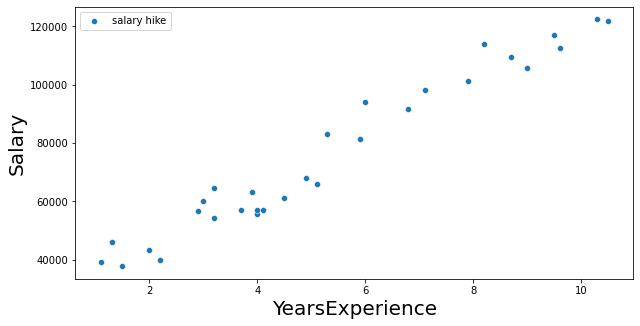

In [29]:
filterwarnings(action='ignore')
plt.figure(figsize=(10,5))
sns.scatterplot('YearsExperience','Salary',data=salary_data,label='salary hike')
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)

In [30]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [31]:
x=salary_data.drop(columns=['Salary'])
y=salary_data['Salary']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
k=['x_train','x_test','y_train','y_test']
j=0
for i in [x_train,x_test,y_train,y_test]:
  print(f'shape of {k[j]} is ', i.shape)
  j+=1


shape of x_train is  (21, 1)
shape of x_test is  (9, 1)
shape of y_train is  (21,)
shape of y_test is  (9,)


### Model training

In [33]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [34]:
model.coef_ ,model.intercept_

(array([9622.64600551]), 25744.955057064144)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

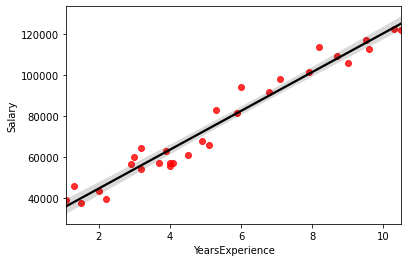

In [35]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'],line_kws={'color':'black'},scatter_kws={'color':'red'})

#### Traning Score

In [36]:
model.score(x_train,y_train)

0.9518010044909193

### Model testing

In [37]:
y_pred= model.predict(x_test)
y_pred

array([ 65197.80367965,  46914.77626919,  38254.39486423,  63273.27447855,
       126782.73811492,  64235.5390791 ,  82518.56648957, 118122.35670996,
       109461.975305  ])

### Model Evaluation

In [59]:
model.score(x_test,y_test)   #same as R-squared error

0.9625652477199742

In [60]:
mean_squared_error(y_pred,y_test)      # Average squared error of each predicted observation

31885663.26105879

In [61]:
np.sqrt(mean_squared_error(y_pred,y_test))      # Average error of each predicted observation

5646.739170623944

In [40]:
mean_absolute_error(y_pred,y_test)

4667.737251300882

In [62]:
r2_score(y_pred,y_test)          # 96 % of total variation in salery can be explain when years of experiance is taken in account

0.964562625114623

In [63]:
import statsmodels.formula.api as smf   #to find other evaluation metrics

In [64]:
li_model = smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [65]:
li_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        23:38:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
li_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

#### From P_value we can say that there is significant relationship between 'salery' and 'Years of Experiance'.